In [ ]:
import nltk
nltk.download('twitter_samples')

from nltk.corpus import twitter_samples
#print(twitter_samples.fileids())

pos_tweets = twitter_samples.strings('positive_tweets.json')
#print(len(pos_tweets))

neg_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [ ]:
nltk.download('stopwords')
 
import string
import re

from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
#LancasterStemmer()  //Accuracy = 72.95
#PorterStemmer()  //Accuracy = 73.0
#SnowballStemmer('english')  //Accuracy = 73.1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.tokenize import TweetTokenizer

#Happy Emoticons
emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'])

#Sad Emoticons
emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])

#all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    #remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    #remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    #remove hashtags
    #only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in emoticons and  # remove emoticons
            word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    return tweets_clean


In [ ]:
#custom_tweet = "RT @Twitter Hello There! Have a great day. :) #good #morning http://hakeem.co.za"

In [ ]:
def bag_of_words(tweet):
    words = clean_tweets(tweet)
    words_dictionary = dict([word, True] for word in words)
    return words_dictionary

In [ ]:
pos_tweets_set = []
pos_tweets_set_for_NB = []
for tweet in pos_tweets:
    pos_tweets_set_for_NB.append((bag_of_words(tweet), 'pos'))
    pos_tweets_set.append(bag_of_words(tweet))

#negative tweets feature set
neg_tweets_set = []
neg_tweets_set_for_NB = []
for tweet in neg_tweets:
    neg_tweets_set_for_NB.append((bag_of_words(tweet), 'neg'))
    neg_tweets_set.append(bag_of_words(tweet))


In [ ]:
pos_labels = ['pos' for i in range(len(pos_tweets_set))]
neg_labels = ['neg' for i in range(len(neg_tweets_set))]
x = pos_tweets_set + neg_tweets_set
y_list = pos_labels + neg_labels

x_list = []
for e in x:
    x_list.append(e.keys())

x_list_train = x_list[1000:5000] + x_list[6000:10000]
x_list_test = x_list[:1000] + x_list[5000:6000]

y_list_train = y_list[1000:5000] + y_list[6000:10000]
y_list_test = y_list[:1000] + y_list[5000:6000]

x_list_test_copy_flatten = []
for e in x_list_test:
    s = ""
    for av in e:
        s += str(av) + " "
    x_list_test_copy_flatten.append(s)

print(x_list_test_copy_flatten[0])

x_list_train_copy_flatten = []
for e in x_list_train:
    s = ""
    for av in e:
        s += str(av) + " "
    x_list_train_copy_flatten.append(s)

print(x_list_train_copy_flatten[0])

followfriday top engag member communiti week 
communal knowledg 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.naive_bayes import BernoulliNB#, MultinomialNB
from sklearn.pipeline import make_pipeline
#SVC = make_pipeline(CountVectorizer(), svm.SVC())  #TfidfVectorizer()
#SVC.fit(x_list_train_copy_flatten, y_list_train)
BNB = make_pipeline(CountVectorizer(), BernoulliNB())  #TfidfVectorizer()
BNB.fit(x_list_train_copy_flatten, y_list_train)
#MNB = make_pipeline(CountVectorizer(), MultinomialNB())  #TfidfVectorizer()
#MNB.fit(x_list_train_copy_flatten, y_list_train)
#LRC = make_pipeline(CountVectorizer(), LogisticRegression())  #TfidfVectorizer()
#LRC.fit(x_list_train_copy_flatten, y_list_train)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
'''
y_pred_SVC = SVC.predict(x_list_test_copy_flatten)

print("Performance of the Support Vector Machine")
print(confusion_matrix(y_list_test, y_pred_SVC))
print(classification_report(y_list_test, y_pred_SVC))
print(accuracy_score(y_list_test, y_pred_SVC))
'''

y_pred_BNB = BNB.predict(x_list_test_copy_flatten)

print("\nPerformance of the Bernoulli Naive Bayes Classifier")
print(accuracy_score(y_list_test, y_pred_BNB))
print(classification_report(y_list_test, y_pred_BNB))
print(confusion_matrix(y_list_test, y_pred_BNB))

'''
y_pred_MNB = MNB.predict(x_list_test_copy_flatten)

print("\nPerformance of the Multinomial Naive Bayes")
print(confusion_matrix(y_list_test, y_pred_MNB))
print(classification_report(y_list_test, y_pred_MNB))
print(accuracy_score(y_list_test, y_pred_MNB))

y_pred_LRC = LRC.predict(x_list_test_copy_flatten)

print("\nPerformance of the Logistic Regression")
print(confusion_matrix(y_list_test, y_pred_LRC))
print(classification_report(y_list_test, y_pred_LRC))
print(accuracy_score(y_list_test, y_pred_LRC))
'''


Performance of the Bernoulli Naive Bayes Classifier
0.743
              precision    recall  f1-score   support

         neg       0.72      0.79      0.75      1000
         pos       0.77      0.70      0.73      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

[[787 213]
 [301 699]]


'\ny_pred_MNB = MNB.predict(x_list_test_copy_flatten)\n\nprint("\nPerformance of the Multinomial Naive Bayes")\nprint(confusion_matrix(y_list_test, y_pred_MNB))\nprint(classification_report(y_list_test, y_pred_MNB))\nprint(accuracy_score(y_list_test, y_pred_MNB))\n\ny_pred_LRC = LRC.predict(x_list_test_copy_flatten)\n\nprint("\nPerformance of the Logistic Regression")\nprint(confusion_matrix(y_list_test, y_pred_LRC))\nprint(classification_report(y_list_test, y_pred_LRC))\nprint(accuracy_score(y_list_test, y_pred_LRC))\n'

In [ ]:
import seaborn as sb
sb.set()
#htmp = sb.heatmap(confusion_matrix(y_pred_SVC, y_list_test).T,annot=True,fmt='d', cbar=False,xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])

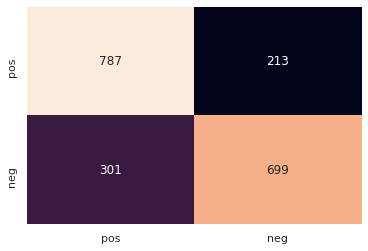

In [ ]:
htmp = sb.heatmap(confusion_matrix(y_pred_BNB, y_list_test).T,annot=True,fmt='d', cbar=False,xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])
#There was no time to change the numbers into percentages, hope that is okay.

In [ ]:
#htmp = sb.heatmap(confusion_matrix(y_pred_MNB, y_list_test).T,annot=True,fmt='d', cbar=False,xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])

In [ ]:
#htmp = sb.heatmap(confusion_matrix(y_pred_LRC, y_list_test).T,annot=True,fmt='d', cbar=False,xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
train = pos_tweets_set[1000:] + neg_tweets_set[1000:]
x_list_train_copy_for_nltk = []
for i in range(len(train)):
  if (i < 4000):
    x_list_train_copy_for_nltk.append((train[i], 'pos'))
  else:
    x_list_train_copy_for_nltk.append((train[i], 'neg'))

NBC = NaiveBayesClassifier.train(x_list_train_copy_for_nltk)

In [ ]:
test = pos_tweets_set[:1000] + neg_tweets_set[:1000]
x_list_test_copy_for_nltk = []
for i in range(len(test)):
  if (i < 1000):
    x_list_test_copy_for_nltk.append((test[i], 'pos'))
  else:
    x_list_test_copy_for_nltk.append((test[i], 'neg'))
accuracy = classify.accuracy(NBC, x_list_test_copy_for_nltk)

In [ ]:
from collections import defaultdict

actual_set = defaultdict(set)
predicted_set = defaultdict(set)

actual_set_cm = []
predicted_set_cm = []

for index, (feature, actual_label) in enumerate(x_list_test_copy_for_nltk):
    actual_set[actual_label].add(index)
    actual_set_cm.append(actual_label)

    predicted_label = NBC.classify(feature)

    predicted_set[predicted_label].add(index)
    predicted_set_cm.append(predicted_label)

print("Performance of the Naive Bayes Classifer")
print(accuracy*100)

from nltk.metrics import precision, recall, f_measure, ConfusionMatrix

print('pos precision: ', precision(actual_set['pos'], predicted_set['pos']))
print('pos recall: ', recall(actual_set['pos'], predicted_set['pos']))
print('pos F-measure: ', f_measure(actual_set['pos'], predicted_set['pos']))

print('neg precision: ', precision(actual_set['neg'], predicted_set['neg']))
print('neg recall: ', recall(actual_set['neg'], predicted_set['neg']))
print('neg F-measure: ', f_measure(actual_set['neg'], predicted_set['neg']))

#Confusion matrix for the test set
#
#Output:
#row = actual_set_cm
#column = predicted_set_cm

cm = ConfusionMatrix(actual_set_cm, predicted_set_cm)
print(cm)

print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))


Performance of the Naive Bayes Classifer
73.05
pos precision:  0.7235693501454898
pos recall:  0.746
pos F-measure:  0.7346134908911867
neg precision:  0.737874097007224
neg recall:  0.715
neg F-measure:  0.7262569832402235
    |   n   p |
    |   e   o |
    |   g   s |
----+---------+
neg |<715>285 |
pos | 254<746>|
----+---------+
(row = reference; col = test)

    |      n      p |
    |      e      o |
    |      g      s |
----+---------------+
neg | <35.8%> 14.2% |
pos |  12.7% <37.3%>|
----+---------------+
(row = reference; col = test)

